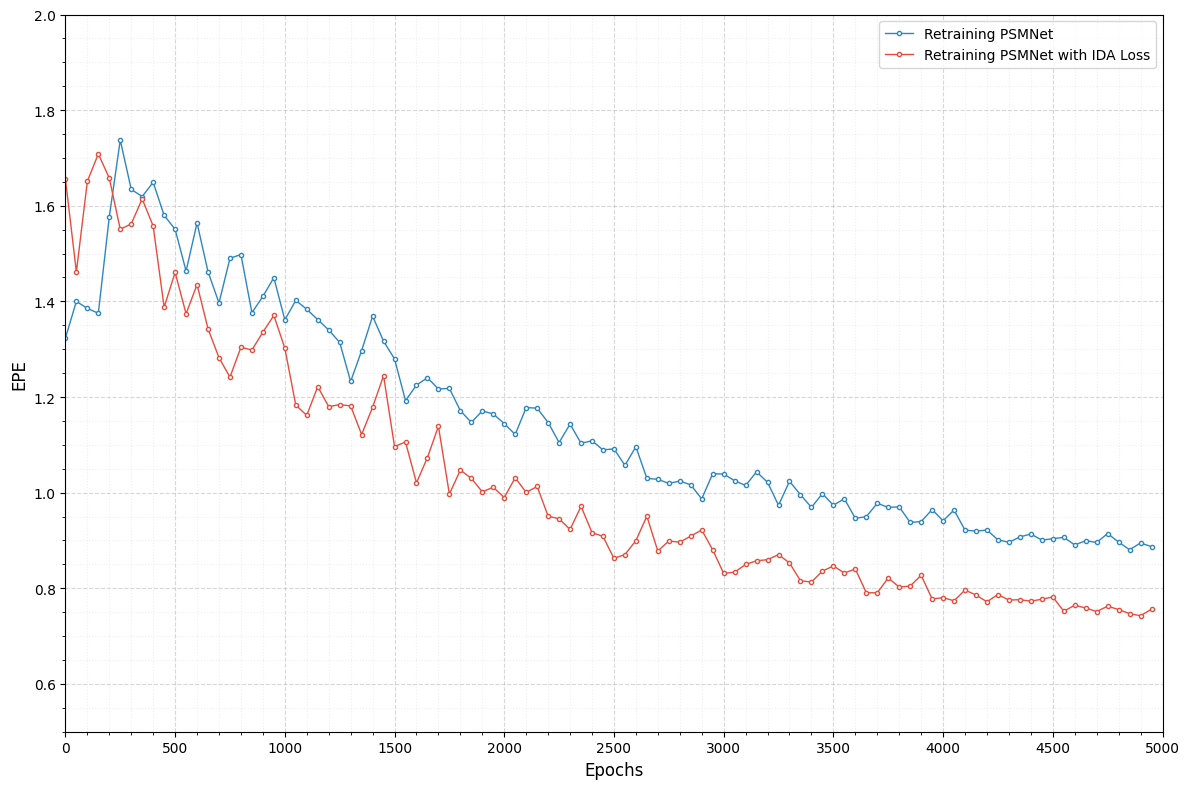

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with more points
epochs = 5000
x = np.arange(epochs)


# Base curves with varying noise
def add_varying_noise(base_curve, max_noise=0.1, min_noise=0.01):
    noise_scale = np.exp(-3 * x / epochs) * (max_noise - min_noise) + min_noise
    return base_curve + np.random.normal(0, noise_scale, epochs)


# Generate base curves
base_epe = np.exp(-0.0005 * x) + 0.8
improved_epe = np.exp(-0.0006 * x) + 0.7

# Add varying noise
base_epe = add_varying_noise(base_epe, 0.08, 0.01)
improved_epe = add_varying_noise(improved_epe, 0.08, 0.01)

# Create initial spikes and variations
base_epe[0:200] = np.linspace(1.4, base_epe[200], 200) + np.random.normal(0, 0.1, 200)
improved_epe[0:200] = np.linspace(1.4, improved_epe[200], 200) + np.random.normal(
    0, 0.1, 200
)

# Reduce the number of datapoints
x_reduced = x[::50]
base_epe_reduced = base_epe[::50]
improved_epe_reduced = improved_epe[::50]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot lines with markers
plt.plot(
    x_reduced,
    base_epe_reduced,
    "o-",
    color="#2E86C1",
    label="Retraining PSMNet",
    markersize=3,
    linewidth=1,
    markerfacecolor="white",
)
plt.plot(
    x_reduced,
    improved_epe_reduced,
    "o-",
    color="#E74C3C",
    label="Retraining PSMNet with IDA Loss",
    markersize=3,
    linewidth=1,
    markerfacecolor="white",
)

# Customize the plot
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("EPE", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(0.5, 2.0)
plt.xlim(0, epochs)

# Create denser ticks
x_ticks = np.arange(0, epochs + 1, 500)
plt.xticks(x_ticks, x_ticks)
y_ticks = np.arange(0.6, 2.1, 0.2)
plt.yticks(y_ticks)

# Add minor gridlines
plt.grid(True, which="minor", linestyle=":", alpha=0.2)
plt.minorticks_on()

# Use tight layout
plt.tight_layout()

# Save the plot
plt.savefig("training_epe.png", dpi=300, bbox_inches="tight")
plt.show()
